<a href="https://www.kaggle.com/code/avinashrola/satellite-image-classification?scriptVersionId=107940673" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-image-classification/data/cloudy/train_17406.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_28684.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_33597.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_34079.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_30586.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_18281.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_33296.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_34303.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_1336.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_30792.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_19000.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_13047.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_21750.jpg
/kaggle/input/satellite-image-classification/data/cl

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout, Conv2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

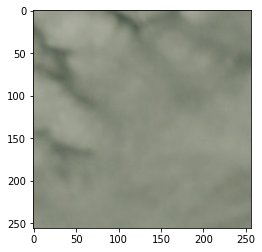

In [3]:
image = plt.imread('/kaggle/input/satellite-image-classification/data/cloudy/train_39361.jpg')
plt.imshow(image)

In [4]:
image.shape

(256, 256, 4)

In [5]:
image = []
label = []
img_width = 64
img_height = 64

for i in os.listdir('../input/satellite-image-classification/data/'):
    for j in os.listdir('../input/satellite-image-classification/data/'+i):
        img = cv2.imread('../input/satellite-image-classification/data/'+i+'/'+j)
        img = cv2.resize(img, (img_height,img_width))
        label.append(i)
        image.append(img)
        
        
        
x = np.array(image)
y = np.array(label)

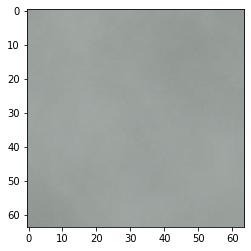

In [6]:
plt.imshow(x[10])

In [7]:
x.shape, y.shape

((5631, 64, 64, 3), (5631,))

In [8]:
le = LabelEncoder()

y = le.fit_transform(y)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.21,random_state=30,stratify=y)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape = (64, 64, 3)))
# model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(200, activation = "relu"))

model.add(Dropout(0.55))
model.add(Dense(4, activation = "softmax"))

model.summary()

2022-10-13 07:41:28.619102: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               3

2022-10-13 07:41:28.737265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 07:41:28.738052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 07:41:28.739393: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 07:41:28.739718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [12]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [13]:
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
x_train.shape, y_train.shape

((4448, 64, 64, 3), (4448,))

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)

In [16]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(x_train,y_train,epochs = 200, validation_data = (x_test,y_test), callbacks=[checkpointer], verbose = 1, steps_per_epoch=3)

2022-10-13 07:41:32.429620: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-10-13 07:41:33.984591: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3/3 [==============================] - 9s 635ms/step - loss: 5.2811 - accuracy: 0.3085 - val_loss: 1.8595 - val_accuracy: 0.3161

Epoch 00001: val_loss improved from inf to 1.85951, saving model to model.weights.best.hdf5
Epoch 2/200
3/3 [==============================] - 0s 157ms/step - loss: 1.6668 - accuracy: 0.3228 - val_loss: 1.1229 - val_accuracy: 0.4641

Epoch 00002: val_loss improved from 1.85951 to 1.12289, saving model to model.weights.best.hdf5
Epoch 3/200
3/3 [==============================] - 0s 161ms/step - loss: 0.9822 - accuracy: 0.5270 - val_loss: 0.8001 - val_accuracy: 0.5740

Epoch 00003: val_loss improved from 1.12289 to 0.80014, saving model to model.weights.best.hdf5
Epoch 4/200
3/3 [==============================] - 0s 154ms/step - loss: 1.4967 - accuracy: 0.3889 - val_loss: 0.9593 - val_accuracy: 0.5106

Epoch 00004: val_loss did not improve from 0.80014
Epoch 5/200
3/3 [==============================] - 0s 151ms/step - loss: 0.8384 - accuracy: 0.5850 - val_loss

In [17]:
model.load_weights('model.weights.best.hdf5')

In [18]:
model.evaluate(x_test,y_test)

37/37 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.9070


[0.23341406881809235, 0.9070160388946533]

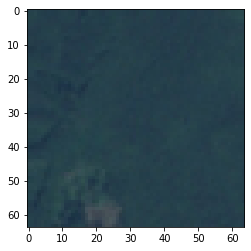

In [19]:
path = '../input/satellite-image-classification/data/green_area/Forest_1404.jpg'
img=plt.imread(path)
plt.imshow(img)
plt.show()
org_label = 'green_area'

In [20]:
img=cv2.resize(img,(64,64))
img = img/255

In [21]:
x=tf.keras.preprocessing.image.array_to_img(img)
x=np.expand_dims(x,axis=0)

In [22]:
# get predictions on the test set
y_pred = model.predict(x_test)

In [23]:
img_label = ['cloudy','desert','green_area','water']

In [24]:
pridicted_img=img_label[np.argmax(model.predict(x_test)[0])]
print("Pridicted Label: ",pridicted_img)
print("Original Label: ",org_label)

Pridicted Label:  green_area
Original Label:  green_area
